# Introduction
   Prostate cancer is cancer that occurs in the prostate ,a small walnut-shaped gland in men that produces the seminal fluid that nourishes and transports sperm.

Prostate cancer is one of the most common types of cancer in men. Usually prostate cancer grows slowly and is initially confined to the prostate gland, where it may not cause serious harm. However, while some types of prostate cancer grow slowly and may need minimal or even no treatment, other types are aggressive and can spread quickly.

In this Notebook, I am going to use three ML and one DL method## (KNN, Logistic Regression, SVM and RNN) to train the Prostate Cancer datasets



In [27]:
#Importing basic packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#Importing other packages
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.layers import Dense, SimpleRNN, Dropout
from keras.metrics import mean_squared_error
from keras.models import Sequential


In [28]:
#Reading dataset into 'Cancer' variable
cancer = pd.read_csv('data_set.csv')

In [29]:
#Viewing info about the dataset
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [30]:
#Displaying first 20 observations in dataset
cancer.head(20)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [31]:
#Checking for any null values, and it can be seen that, there is none
cancer.isnull().any()

id                   False
diagnosis_result     False
radius               False
texture              False
perimeter            False
area                 False
smoothness           False
compactness          False
symmetry             False
fractal_dimension    False
dtype: bool

In [32]:
#Viewing some statistical analysis of the dataset
cancer.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [33]:

#Since diagnosis_result is of datatype object, let's convert it to bin 0f 1 and 0
cancer['diagnosis_result'] = cancer['diagnosis_result'].map({'M' : 1, 'B' : 0})

cancer['diagnosis_result'].value_counts()

#bins = (2,6.5,8)
#group_names = ['B', 'M']
#cancer['diagnosis_result'] = pd.cut(cancer['diagnosis_result'], bins = bins, labels = group_names)

#Now lets assign a labels to our quality variable
#label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
#cancer['diagnosis_result'] = label_quality.fit_transform(cancer['diagnosis_result'])
#cancer['diagnosis_result'].value_counts()


1    62
0    38
Name: diagnosis_result, dtype: int64

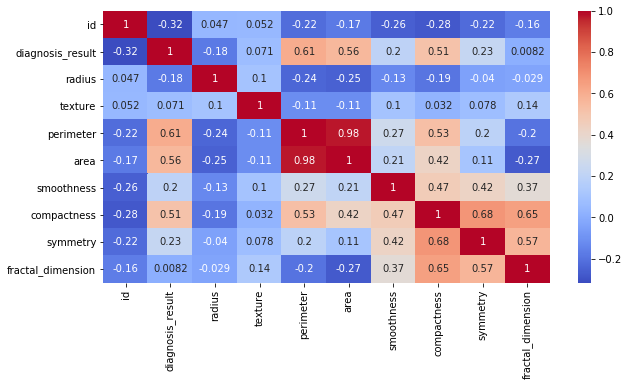

In [34]:
#Plotting a heatmap to see correlation between all attributes
#From the heatmap, it is seen that, diagnosis strongly correlates with perimeter so it can be infered that , perimeter is a deterministic character of a cell being Malign or Benign


plt.subplots(figsize=(10, 5))
sns.heatmap(cancer.corr(), annot = True, cmap = 'coolwarm')

In [35]:
cancer.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [36]:
# We don't care id of the columns. So, we drop that!
cancer.drop(['id'],axis=1,inplace=True)

In [37]:
cancer.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [38]:
# We should assign x and y values for test-train datas split.
y = cancer.diagnosis_result.values
x_data = cancer.drop(['diagnosis_result'],axis=1)

In [39]:
x_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [40]:
# Normalization: Normalization means all of the values of data, scale between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x_data)

In [41]:
x

array([[0.875     , 0.0625    , 0.825     , 0.44868735, 1.        ,
        0.78175896, 0.63313609, 0.59090909],
       [0.        , 0.125     , 0.675     , 0.67064439, 1.        ,
        0.13355049, 0.27218935, 0.09090909],
       [0.75      , 1.        , 0.65      , 0.59725537, 0.75342466,
        0.39739414, 0.4260355 , 0.15909091],
       [0.3125    , 0.3125    , 0.21666667, 0.1097852 , 0.        ,
        0.80130293, 0.73964497, 1.        ],
       [0.        , 0.5       , 0.69166667, 0.65334129, 0.97260274,
        0.30944625, 0.27218935, 0.13636364],
       [1.        , 0.875     , 0.25833333, 0.16408115, 0.79452055,
        0.42996743, 0.43786982, 0.52272727],
       [0.4375    , 0.9375    , 0.56666667, 0.5       , 0.34246575,
        0.23127036, 0.26035503, 0.09090909],
       [0.375     , 0.4375    , 0.31666667, 0.22434368, 0.67123288,
        0.41368078, 0.50295858, 0.5       ],
       [0.625     , 0.8125    , 0.3       , 0.18973747, 0.78082192,
        0.50488599, 0.591715

In [42]:
# We are ready to split datas as train and test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#%40 data will assign as 'Test Datas'

#Creating array of method names to compare them later in the conclusion of the notebook 
method_names=[] 
method_scores=[]

In [43]:
# Let's look at new values.
x_train

array([[0.5625    , 0.125     , 0.175     , 0.12350835, 0.34246575,
        0.05537459, 0.33727811, 0.13636364],
       [0.125     , 0.        , 0.23333333, 0.1575179 , 0.24657534,
        0.18241042, 0.34319527, 0.25      ],
       [0.0625    , 0.8125    , 0.375     , 0.26431981, 0.47945205,
        0.48534202, 0.53254438, 0.36363636],
       [0.125     , 0.        , 0.63333333, 0.53818616, 0.28767123,
        0.58957655, 0.56804734, 0.22727273],
       [0.5       , 0.625     , 0.24166667, 0.17959427, 0.38356164,
        0.04560261, 0.14201183, 0.09090909],
       [0.8125    , 0.5       , 0.375     , 0.27267303, 0.60273973,
        0.39739414, 0.56213018, 0.40909091],
       [0.9375    , 0.3125    , 0.28333333, 0.21539379, 0.16438356,
        0.07166124, 0.25443787, 0.06818182],
       [0.8125    , 0.1875    , 0.21666667, 0.14856802, 0.47945205,
        0.10749186, 0.32544379, 0.29545455],
       [1.        , 0.        , 0.26666667, 0.16348449, 0.67123288,
        0.65798046, 0.402366

# Classification


Logistic Regression Classification Test Accuracy 0.8


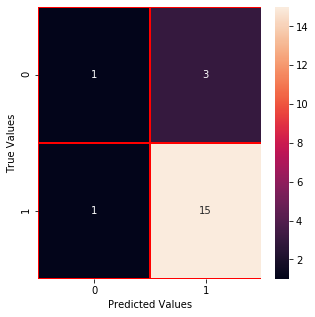

In [44]:
# Firstly, we start with Logistic Regression
#from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression()
#log_reg.fit(x_train, y_train) #Fitting
#print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
#method_names.append("Logistic Reg.")
#method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
#y_pred = log_reg.predict(x_test)
#conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
#f, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
#plt.xlabel("Predicted Values")
#plt.ylabel("True Values")
#plt.show()

Score for Number of Neighbors = 5: 0.8


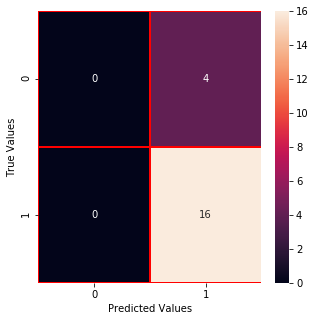

In [45]:
# Continue with; KNN Classification!
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5)  # 5 is optional.
#knn.fit(x_train,y_train)
#print("Score for Number of Neighbors = 5: {}".format(knn.score(x_test,y_test)))
#method_names.append("KNN")
#method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
#y_pred = knn.predict(x_test)
#conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
#f, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
#plt.xlabel("Predicted Values")
#plt.ylabel("True Values")
#plt.show()

SVM Classification Score is: 0.8


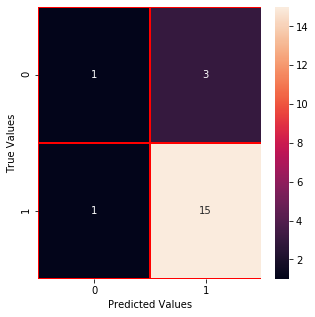

In [46]:
# SVM!
#from sklearn.svm import SVC
#svm = SVC(random_state=42)
#svm.fit(x_train,y_train)
#print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
#method_names.append("SVM")
#method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
#y_pred = svm.predict(x_test)
#conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
#f, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
#plt.xlabel("Predicted Values")
#plt.ylabel("True Values")
#plt.show()

In [47]:
#RNN model
model = Sequential()
# Add the first layer and Dropout regularization
model.add(SimpleRNN(units=100,activation='tanh',return_sequences=True, 
                    input_shape=(trainX.shape[1],1)))
model.add(Dropout(0.20))
# Second layer and Dropout regularization
model.add(SimpleRNN(units = 100, activation='tanh',return_sequences=True))
model.add(Dropout(0.20))
# Third layer and Dropout regularization
model.add(SimpleRNN(units = 70, activation='tanh', return_sequences= True))
model.add(Dropout(0.20))
# Fourth layer and Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.20))
# Add final or output layer
model.add(Dense(units=1))

# Compile our RNN model
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])
# Fitting the RNN to the training set
model.fit(trainX, y_train, epochs = 200, batch_size=32)
# Remember; epochs, batch_size etc. are just some of hyper parameters. 
# You can change these parameters whatever you want
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/200
80/80 [==============================] - 1s 13ms/step - loss: 2.1161 - accuracy: 0.1375
Epoch 2/200
80/80 [==============================] - 0s 675us/step - loss: 0.6832 - accuracy: 0.4375
Epoch 3/200
80/80 [==============================] - 0s 712us/step - loss: 0.6828 - accuracy: 0.4500
Epoch 4/200
80/80 [==============================] - 0s 675us/step - loss: 0.6273 - accuracy: 0.4750
Epoch 5/200
80/80 [==============================] - 0s 637us/step - loss: 0.4634 - accuracy: 0.4875
Epoch 6/200
80/80 [==============================] - 0s 550us/step - loss: 0.5295 - accuracy: 0.4625
Epoch 7/200
80/80 [==============================] - 0s 750us/step - loss: 0.5887 - accuracy: 0.4250
Epoch 8/200
80/80 [==============================] - 0s 762us/step - loss: 0.4550 - accuracy: 0.5750
Epoch 9/200
80/80 [==============================] - 0s 749us/step - loss: 0.4718 - accuracy: 0.5750
Epoch 10/200
80/80 [==============================] - 0s 712us/step - loss: 0.4339 - accurac

80/80 [==============================] - 0s 537us/step - loss: 0.1566 - accuracy: 0.8000
Epoch 161/200
80/80 [==============================] - 0s 575us/step - loss: 0.1025 - accuracy: 0.9125
Epoch 162/200
80/80 [==============================] - 0s 575us/step - loss: 0.1356 - accuracy: 0.8375
Epoch 163/200
80/80 [==============================] - 0s 562us/step - loss: 0.1468 - accuracy: 0.7750
Epoch 164/200
80/80 [==============================] - 0s 612us/step - loss: 0.1507 - accuracy: 0.8125
Epoch 165/200
80/80 [==============================] - 0s 562us/step - loss: 0.1388 - accuracy: 0.7875
Epoch 166/200
80/80 [==============================] - 0s 612us/step - loss: 0.1179 - accuracy: 0.8250
Epoch 167/200
80/80 [==============================] - 0s 537us/step - loss: 0.1196 - accuracy: 0.8375
Epoch 168/200
80/80 [==============================] - 0s 525us/step - loss: 0.1664 - accuracy: 0.8125
Epoch 169/200
80/80 [==============================] - 0s 575us/step - loss: 0.1334 - a

In [48]:
method_names.append("RNN")
method_scores.append(0.887)

In [53]:
#comparing sample predictions against expectations.
#Numpy array of y_pred to list
x=np.array(y_pred).tolist()

#Showing first 10 prediction
print("\nThe prediction: \n")
for i in range(0,10):
    print(x[i])

#Showing first 10 expectations
print("\nThe expectation: \n")
print(y_test.head(10))


The prediction: 

1
1
1
1
1
1
1
0
0
1

The expectation: 



AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Conclusion
After training with different methods, lets compare which is the best.


Text(0, 0.5, 'Method Score')

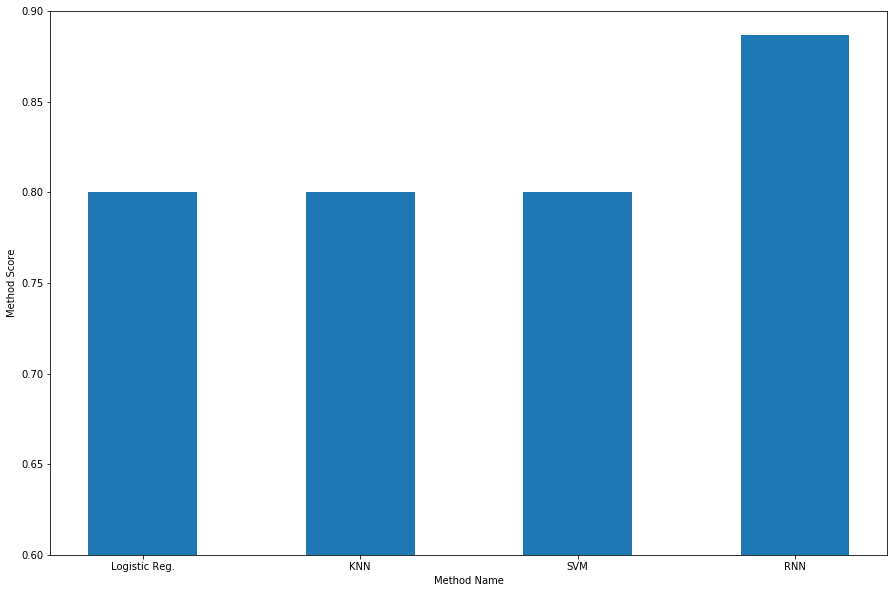

In [49]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

From the plot, RNN is the best method to use.

In [52]:
model.save('ProstateModel.h5')
model_json = model.to_json()
with open('Prostate_model_json.json', 'w') as files:
  files.write(model_json)

model.save_weights('ProstateModelWeight.h5')
print('model was saved..')

model was saved..
